# Distribution Functions

Some concepts to start with: 
- probability 
- random variable
- discrete/continuous data

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,6)

## Throwing a dice 

In [4]:
min_pip = 1 # pip = little dots on the dice
max_pip = 6
rolls = 1000 # discrete uniform distribution
one_dice = np.random.randint(min_pip,max_pip+1,rolls)  

In [6]:
#one_dice

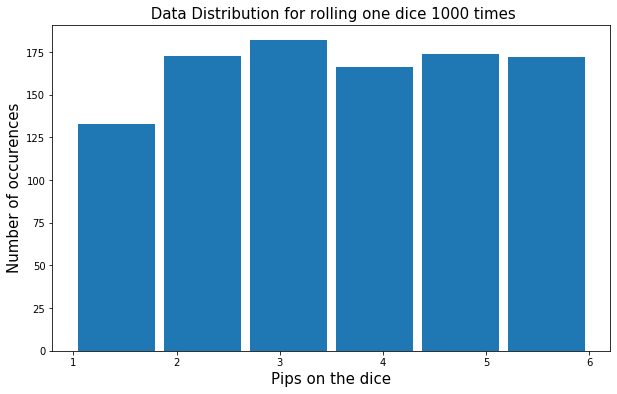

In [7]:
plt.hist(one_dice, bins=6, rwidth = 0.9)
plt.title(f" Data Distribution for rolling one dice {rolls} times", fontsize=15)
plt.xlabel('Pips on the dice', fontsize=15)
plt.ylabel('Number of occurences', fontsize=15);

**Defined by:** The minimum value of x: a and the maximum value of x: b

**Usage:** Simulation of situations in which each outcome is equally likely

**Mean:** $\frac {1}{2} (a+b)$

**Variance:** ${\frac {1}{12}}(b-a)^{2}$

### CONCEPT: Probability Mass/Density Function
#### For discrete X:
Given a random variable X, the probability mass function (pmf) is defined as a function that for each value x returns the probability that the realization of the random variable X is equal to the value x.

$f(x) = P(X=x)$

In [8]:
one_dice_probs = stats.randint.pmf(one_dice, low=1, high=7)

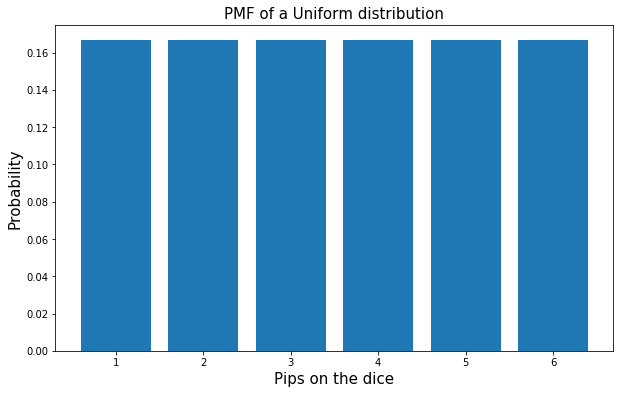

In [9]:
plt.bar(one_dice, one_dice_probs)
plt.title(f'PMF of a Uniform distribution', fontsize=15)
plt.xlabel('Pips on the dice', fontsize=15)
plt.ylabel('Probability', fontsize=15);

The pmf of the Discrete Uniform Distribution is:

$f(x)=\frac {1}{n}$

### Probability Density Function

#### For continuous X:
Given a random variable X, the probability densitiy function (pdf) is defined as a function for which the area under the curve for each interval [a, b] returns the probability that the realization of the random variable X is within the intervall [a, b].

$f([a, b]) = P(a \leq X \leq b)$

## Now if we throw two dice and sum the eyes: 

In [16]:
two_dice = []
for i in range(2000):
    d1 = np.random.randint(1,7)
    d2 = np.random.randint(1,7)
    two_dice.append(d1 + d2)

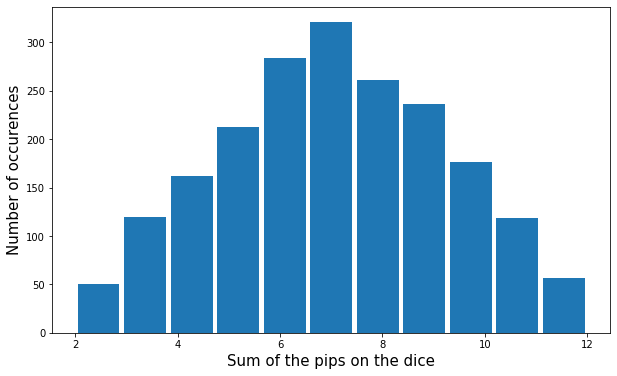

In [17]:
plt.hist(two_dice, bins=11, rwidth = 0.9)
plt.xlabel('Sum of the pips on the dice', fontsize=15)
plt.ylabel('Number of occurences', fontsize=15);

The triangular distribution (actually a continuous distribution) is is defined by: 
  - lower limit a
  - upper limit b 
  - and mode c
  - a < b and a ≤ c ≤ b
 
The pdf is: 
 f(x) = $\frac{2(x-a)}{(b-a)(c-a)}$

**Usage:**   When little is known, for example only smallest and largest values and most likely outcome.

**Mean** : $\frac {a+b+c}{3}$  

**Variance:** $\frac {a²+b²+c² - ab - ac -bc}{18}$

In [18]:
No triang-pmf -> only pdf
#two_dice_probs = stats.triang.pdf(x=[1,2,3,4,5,6,7,8,9,10,11,12,13], loc=1, c=0.5, scale=12)
#plt.plot(two_dice_probs);

SyntaxError: invalid syntax (<ipython-input-18-eaf1b647d2f8>, line 1)

## ...and what happens if we throw many dice?

In [19]:
def many_dice(n_throws, n_dice):
    dice_list = []
    for throw in range(n_throws): 
        throw_sum = 0
        for d in range(n_dice): 
            d_eyes = np.random.randint(1,7)
            throw_sum += d_eyes
        dice_list.append(throw_sum/n_dice)   
    return dice_list

In [22]:
multiple_dice = many_dice(1000, 2000)

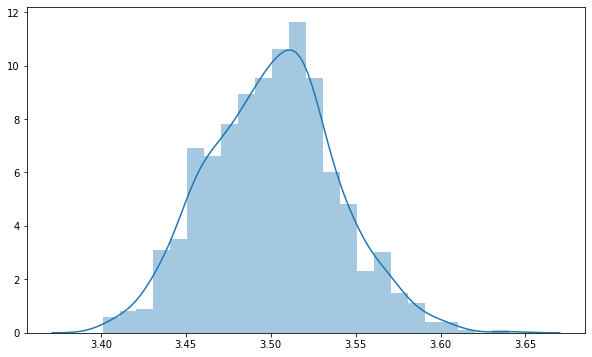

In [23]:
sns.distplot(multiple_dice);

### CONCEPT: Central Limit Theorem
The means drawn from multiple samples will resemble the bell-shape of the normal distribution even if the data is not normally distributed.

The pdf of the normal distribution is:

$f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$

**Usage:** occurs frequently in nature

**Characterized by:**
The mean $\mu$ and the standard deviation $\sigma$.

In [30]:
# What happens if we change the standard deviation and the mean?
mean =  10
mean1 = 0
std = 1
std2 = 2
std3 = 5
var_normal = np.random.normal(mean1, std, 1000)
var_normal2 = np.random.normal(mean, std2, 1000)
var_normal3 = np.random.normal(mean, std3, 1000)

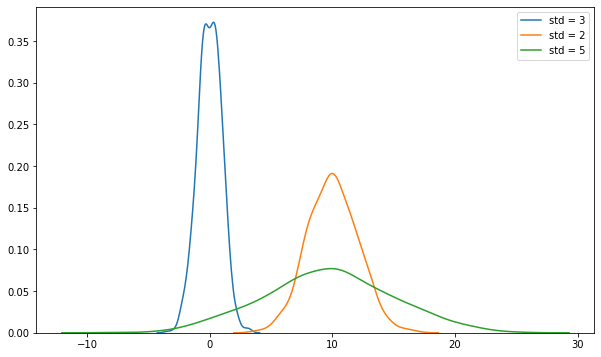

In [31]:
sns.distplot(var_normal, hist = False, kde = True,label='std = 3')
sns.distplot(var_normal2, hist = False, kde = True, label='std = 2')
sns.distplot(var_normal3, hist = False, kde = True,label='std = 5');

- a normal distribution with mean 0 and standard deviation 1 is called: standard normal distribution.

### CONCEPT: Cumulative Distribution Function

Given a random variable X, the cumulative distribution function (cdf) is defined as a function that for each value x returns the probability that the realization of the random variable X is smaller than or equal to the value x.

$F(x) = P(X \leq x)$

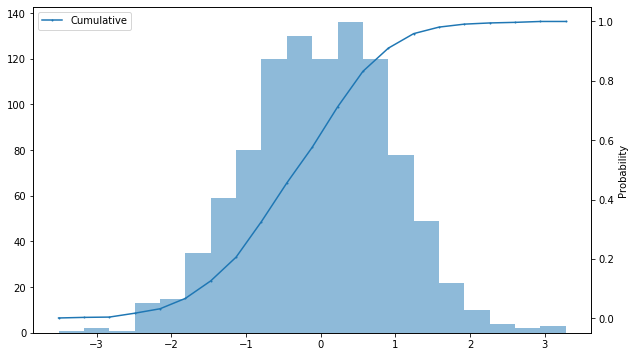

In [32]:
ax = plt.axes()
values, base, _ = plt.hist(var_normal, bins=20, alpha = 0.5, label = "Histogram")
ax_bis = ax.twinx()
values = np.append(values,0)
ax_bis.plot(base, np.cumsum(values)/ np.cumsum(values)[-1], marker='o', linestyle='-', markersize = 1, label = "Cumulative" )
plt.ylabel("Probability")
ax_bis.legend();

In [33]:
cdf_values = stats.norm.cdf(var_normal, mean, std)

In [38]:
#np.sort(cdf_values)

# Bernoulli Distribution

The pmf is:

$f(x\mid p)={\begin{cases}p^{x}(1-p)^{1-x}&{\text{falls}}\quad x=0,1\\0&{\text{sonst.}}\end{cases}}$

**Defined by:** The probability of observing a positive outcome (p).

**Usage:** One time draw of a random variable with a bivariate sample space (eg. coin toss)

**Mean:** $p$

**Variance:** $p*(1-p)$

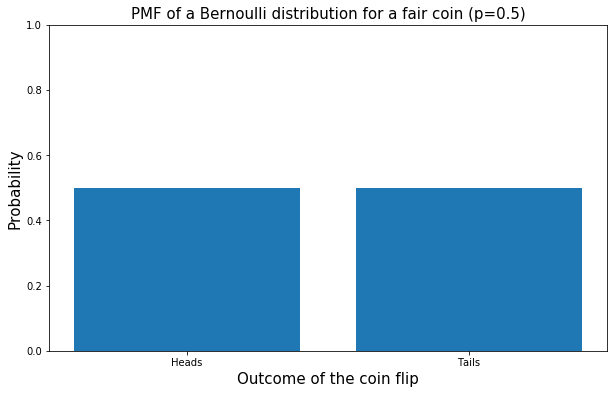

In [36]:
k = [0, 1]
labels = ['Heads', 'Tails']
p = 0.5
y = stats.bernoulli.pmf(k, p)

plt.bar(labels, y)
plt.title(f'PMF of a Bernoulli distribution for a fair coin (p={p})', fontsize=15)
plt.xlabel('Outcome of the coin flip', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.ylim(0, 1);

# Binomial Distribution

The pmf of the Binomial Distribution is:

$f(k,n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}$

**Defined by:** The probability of observing a positive outcome (p) and the number of draws (n).

**Usage:** Predicting the chances of occurence of bernoulli distributed random variables in multiple draws

**Mean:** $n*p$

**Variance:** $n*p*(1-p)$

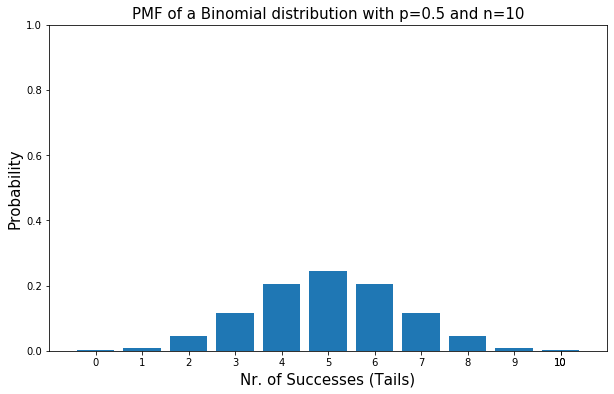

In [37]:
p = 0.5
n = 10
k = list(range(n+1))
y = stats.binom.pmf(k, p=p, n=n)

plt.bar(k, y)
plt.title(f'PMF of a Binomial distribution with p={p} and n={n}', fontsize=15)
plt.xlabel('Nr. of Successes (Tails)', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.xticks(k + [10])
plt.xlim(-1, 11)
plt.ylim(0, 1);

## Additional Distributions:
- Poisson
- Geometric
- Exponential
- Negative Binomial